Primeres files del conjunt de dades:
   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0            

C:\Users\radia\AppData\Local\Temp\ipykernel_3636\3599042155.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=data, palette='viridis')


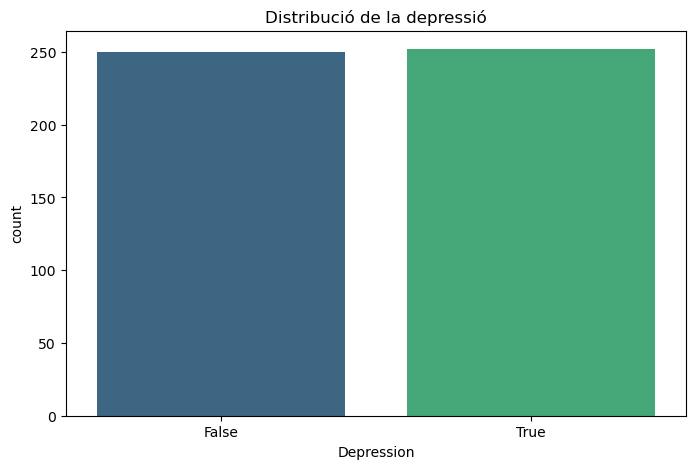

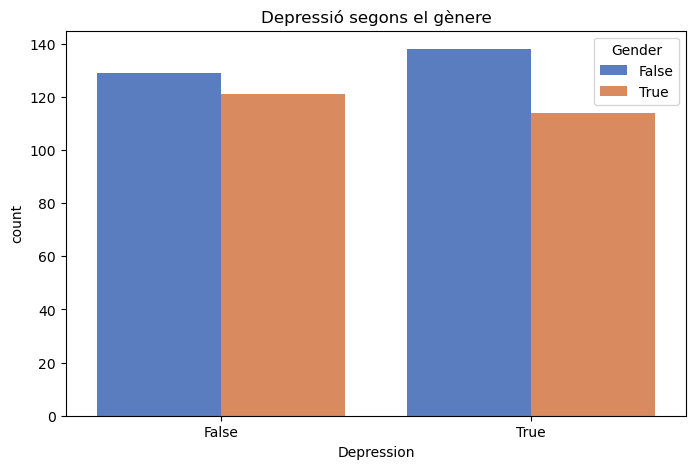

C:\Users\radia\AppData\Local\Temp\ipykernel_3636\3599042155.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Academic Pressure', data=data, palette='coolwarm')


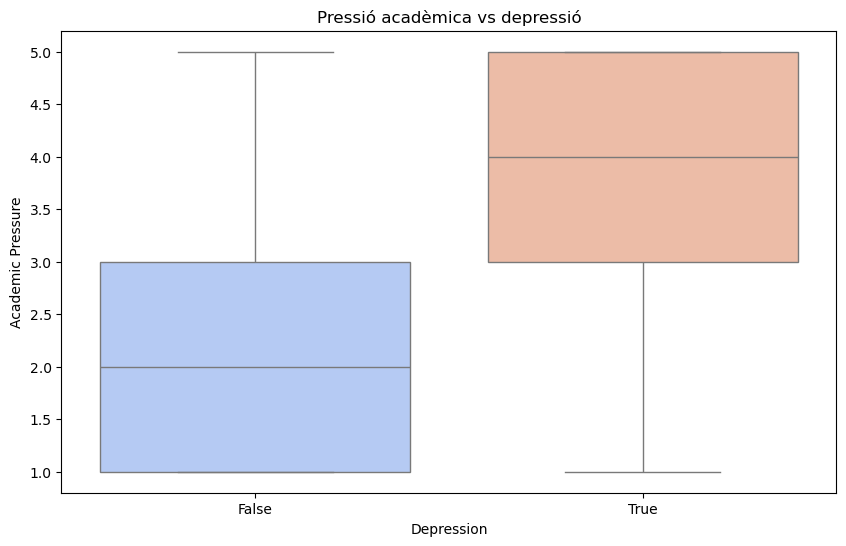

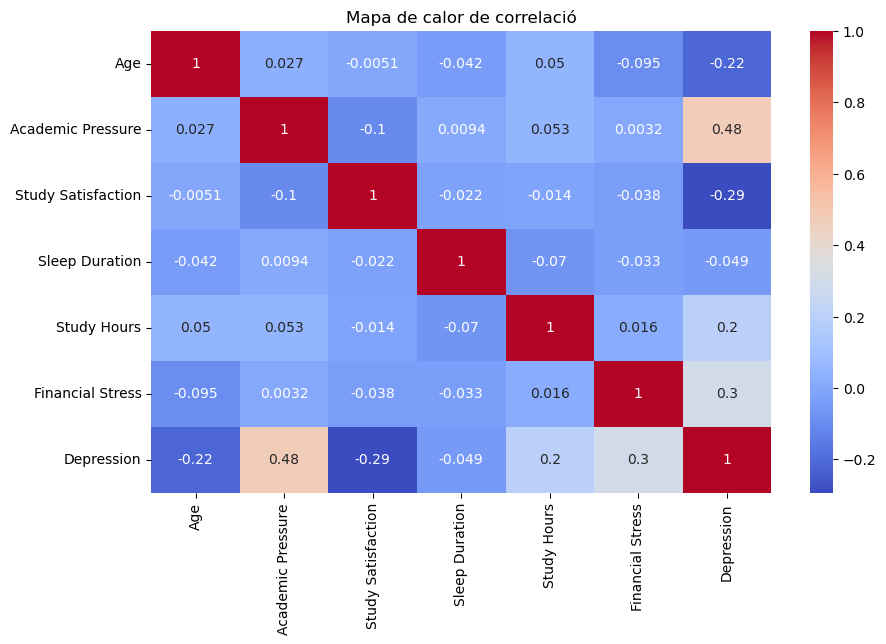

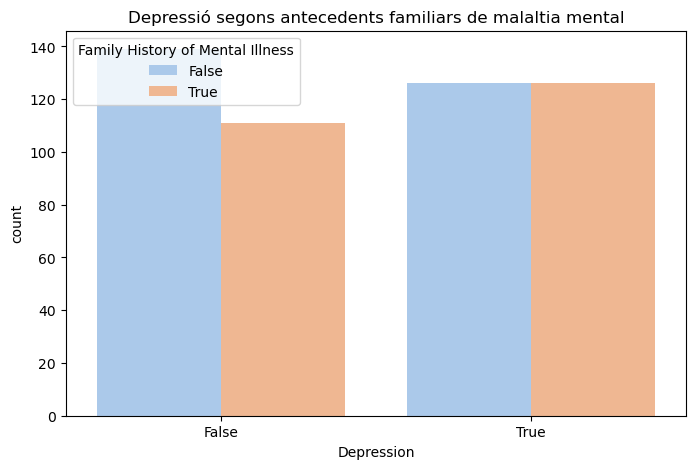

C:\Users\radia\AppData\Local\Temp\ipykernel_3636\3599042155.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Sleep Duration', data=data, palette='Set2')


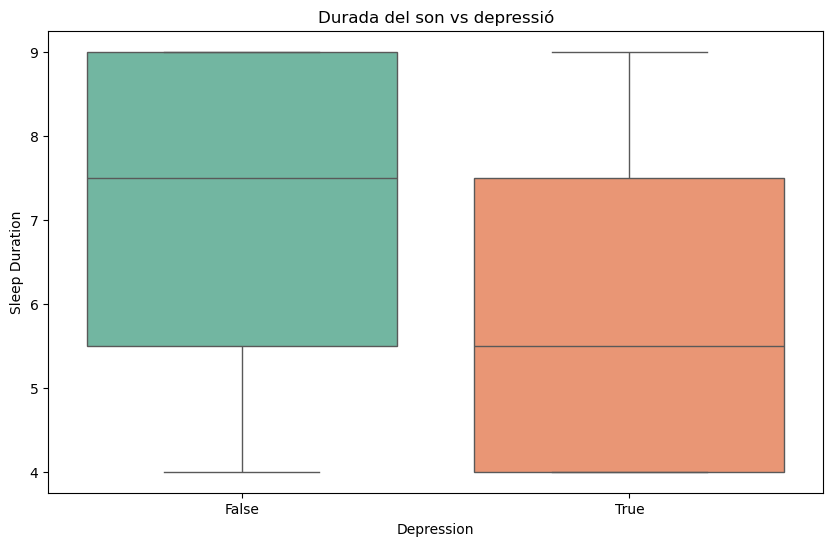

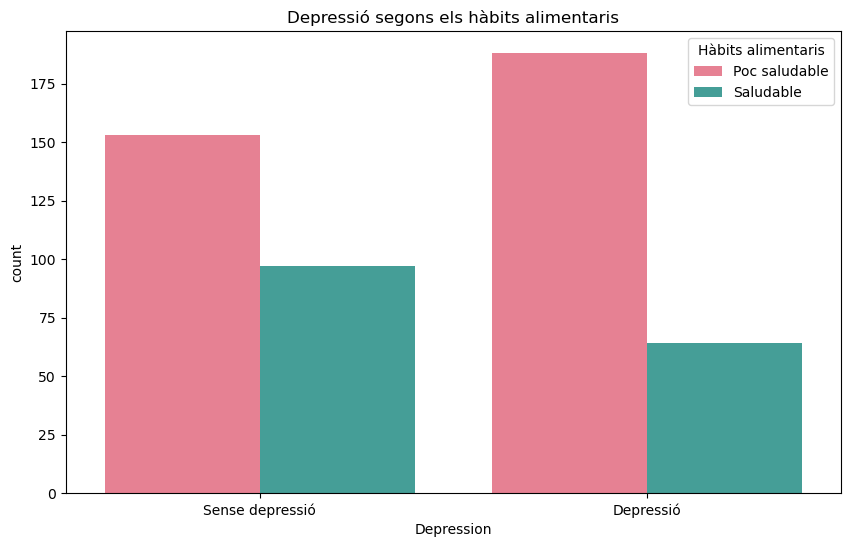


Anàlisi completada. Les visualitzacions s'han mostrat.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar el conjunt de dades
data = pd.read_csv('Depression_Student_Dataset.csv')

# Mostrar les primeres files del conjunt de dades
print("Primeres files del conjunt de dades:")
print(data.head())

# Mostrar estadístiques bàsiques del conjunt de dades
print("\nEstadístiques bàsiques del conjunt de dades:")
print(data.describe())

# Comprovar valors perduts
print("\nValors perduts en el conjunt de dades:")
print(data.isnull().sum())

# Preprocessament
# Convertir el gènere a binari (0: Home, 1: Dona)
data['Gender'] = data['Gender'].map({'Male': False, 'Female': True})

# Convertir els hàbits alimentaris a binari (0: Poc saludable, 1: Saludable)
data['Dietary Habits'] = data['Dietary Habits'].map({'Unhealthy': False, 'Healthy': True, 'Moderate': False})

# Convertir "Has tingut mai pensaments suïcides?" a binari (0: No, 1: Sí)
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map({'No': False, 'Yes': True})

# Convertir antecedents familiars de malaltia mental a binari (0: No, 1: Sí)
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'No': False, 'Yes': True})

# Convertir depressió a binari (0: No, 1: Sí)
data['Depression'] = data['Depression'].map({'No': False, 'Yes': True})

# Convertir durada del son a categories numèriques
data['Sleep Duration'] = data['Sleep Duration'].map({
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '6-7 hours': 6.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
})

# Verificar els noms de les columnes i gestionar dades mancants o no numèriques
numeric_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
                   'Study Hours', 'Financial Stress']
# Assegurar-se que totes les columnes existeixen i són numèriques
for col in numeric_columns + ['Depression']:
    if col not in data.columns:
        print(f"La columna '{col}' no s'ha trobat en el conjunt de dades!")
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Eliminar files amb valors perduts en les columnes seleccionades
filtered_data = data[numeric_columns + ['Depression']].dropna()

# Visualització de dades: distribució de la depressió
plt.figure(figsize=(8, 5))
sns.countplot(x='Depression', data=data, palette='viridis')
plt.title('Distribució de la depressió')
plt.show()

# Analitzar l'impacte del gènere en la depressió
plt.figure(figsize=(8, 5))
sns.countplot(x='Depression', hue='Gender', data=data, palette='muted')
plt.title('Depressió segons el gènere')
plt.show()

# Analitzar la relació entre la pressió acadèmica i la depressió
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='Academic Pressure', data=data, palette='coolwarm')
plt.title('Pressió acadèmica vs depressió')
plt.show()

# Map de calor de correlació per analitzar les relacions entre variables numèriques
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlació')
plt.show()

# Analitzar l'impacte dels antecedents familiars de malaltia mental en la depressió
plt.figure(figsize=(8, 5))
sns.countplot(x='Depression', hue='Family History of Mental Illness', data=data, palette='pastel')
plt.title('Depressió segons antecedents familiars de malaltia mental')
plt.show()

# Analitzar la durada del son i la depressió
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='Sleep Duration', data=data, palette='Set2')
plt.title('Durada del son vs depressió')
plt.show()

# Analitzar els hàbits alimentaris i la depressió
# Actualitzar les etiquetes dels hàbits alimentaris en el gràfic
plt.figure(figsize=(10, 6))
sns.countplot(x='Depression', hue='Dietary Habits', data=data, palette='husl')
plt.title('Depressió segons els hàbits alimentaris')
plt.xticks([0, 1], ['Sense depressió', 'Depressió'])  # Assegurar que l'eix de la depressió estigui etiquetat
plt.legend(title='Hàbits alimentaris', labels=['Poc saludable', 'Saludable'])  # Ajustar les etiquetes de la llegenda
plt.show()

# Resum
print("\nAnàlisi completada. Les visualitzacions s'han mostrat.")
